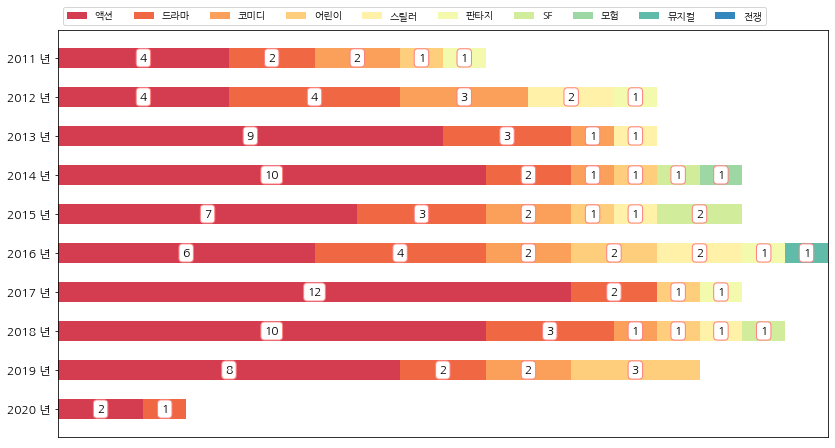

In [1]:
#-----------------------------------------------------------------------------
# csv 파일 로드 및 그래프 사용 import
import csv
import numpy as np
import matplotlib.pyplot as plt


class CsvDATA: 
#------------ csv 파일 로드 
    def __init__(self,fname):
        self.lists=[]
        file=open(fname,encoding='cp949') # 변수명=open(파일 경로,encoding 작업)
        getline = csv.reader(file)
        line_count=0
        for i in getline:
            if line_count>5: #------ csv 파일 로드시 상단 필요없는 줄 건너띄기 
                self.lists.append(i)
            line_count+=1
        file.close()
        
#--------- 리스트 in 리스트로 카운트 
    def Counts_Genre(self,list_input,genre_list):
        count_list=[]
        for genre in genre_list:
            count_list.append(0) # Genre_list의 요소 수 만큼 카운트 리스트를 생성하고 각 값을 0으로 준다 
    
        for i in list_input:
            for idx,name_input in enumerate(genre_list): #enumerate 를 이용하여 요소 인덱스 값에 접근 
                if name_input in i[11]:
                    count_list[idx]+=1 #위에서 생성한 카운트리스트의 인덱스 요소마다 카운트 상승 
        return count_list

#---------- 검색하고자 하는 요소들로 이루어진 리스트 생성 메소드
    def GetYearList(self,years_list):
        Data_list_years=[]
        for year in years_list:
            Data_list_years.append([]) # years_list에 입력된 리스트를 적용 ([])

        datas=self.lists.copy() # CSVDATA에서 불러온 원본데이터 복사 
        for data in datas: 
            for idx,year in enumerate(years_list): 
                if year in data[2]:
                    Data_list_years[idx].append(data)
        return Data_list_years

    

    
dataA3 = CsvDATA('Data_List_A3.csv')
#----- 전체 데이터에서 검색하고자 하는 요소리스트 
years_list=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'] 
get_years_data=dataA3.GetYearList(years_list)



Genre_List=['액션','드라마','코미디','어린이','스릴러','판타지','SF','모험','뮤지컬','전쟁']
#--- 함수화 시도중 20210420
#----- 각 연도별 장르 카운트 
genreCount2011=dataA3.Counts_Genre(get_years_data[0],Genre_List)
genreCount2012=dataA3.Counts_Genre(get_years_data[1],Genre_List)
genreCount2013=dataA3.Counts_Genre(get_years_data[2],Genre_List)
genreCount2014=dataA3.Counts_Genre(get_years_data[3],Genre_List)
genreCount2015=dataA3.Counts_Genre(get_years_data[4],Genre_List)
genreCount2016=dataA3.Counts_Genre(get_years_data[5],Genre_List)
genreCount2017=dataA3.Counts_Genre(get_years_data[6],Genre_List)
genreCount2018=dataA3.Counts_Genre(get_years_data[7],Genre_List)
genreCount2019=dataA3.Counts_Genre(get_years_data[8],Genre_List)
genreCount2020=dataA3.Counts_Genre(get_years_data[9],Genre_List)



#---------------------------------------------------시각화 그래프 부분 ---------------------------


#---전역 폰트 설정 
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
#-------------------------------------------


category_names=Genre_List   

results = {
    '2011 년': genreCount2011,
    '2012 년': genreCount2012,
    '2013 년': genreCount2013,
    '2014 년': genreCount2014,
    '2015 년': genreCount2015,
    '2016 년': genreCount2016,
    '2017 년': genreCount2017,
    '2018 년': genreCount2018,
    '2019 년': genreCount2019,
    '2020 년': genreCount2020,
}

#---------- 그래프 표기 함수 -------------
def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Spectral_r')(np.linspace(0.9, 0.1, data.shape[1])) # RdYlGn  0.15, 0.85

    fig, ax = plt.subplots(figsize=(13.8,7.5))    # 9.2:5
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'# if r * g * b < 0.3 else 'black'
        box1 = {'boxstyle': 'round','ec': (1.0, 0.5, 0.5),'fc': 'white'}
        for y, (x, c) in enumerate(zip(xcenters, widths)):
              if c > 0:  #--------- value 값이 0일때 건너띄기 1이상일 경우에만 표기
                    ax.text(x, y, str(int(c)), ha='center', va='center',color=text_color,bbox=box1)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()
